<a href="https://colab.research.google.com/github/abrzezinska/projects/blob/main/ML_Molecules_Solubility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Project**

# Load data

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data preparation

### x,y separation

In [ ]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [ ]:
x = df.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data spliting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

In [ ]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
1131,2.43100,430.934,6.0,0.000000
1,2.37650,133.405,0.0,0.000000
45,3.21160,235.906,0.0,0.750000
639,3.92420,333.266,6.0,0.260870
446,1.57760,129.384,0.0,0.000000
...,...,...,...,...
1103,-0.62838,126.115,0.0,0.666667
844,1.57722,107.156,0.0,0.750000
810,0.17930,74.079,0.0,0.000000
784,3.10250,191.455,0.0,0.750000


In [ ]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
344,-0.33948,125.131,0.0,0.666667
820,4.08030,214.349,10.0,0.000000
498,1.36870,62.499,0.0,0.000000
407,3.13070,258.104,2.0,0.375000
562,3.86590,300.314,4.0,0.545455
...,...,...,...,...
1136,-0.97620,60.056,0.0,0.000000
1093,1.51600,254.355,5.0,0.000000
956,4.23610,367.816,7.0,0.428571
921,3.10250,191.455,0.0,0.750000


## Model Building

### Linear Regression

Training model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Applying the model to make prediction

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

array([ -4.34907471,  -2.39577721,  -4.03144864,  -4.97254076,
        -1.76103331,   0.94283602,  -3.21886302,  -2.06686407,
        -3.30806515,  -1.1535936 ,  -2.62509201,  -2.65554314,
        -5.09876454,  -3.02990686,  -0.64841279,  -7.24330006,
        -3.79646953,  -3.01660745,  -2.9017818 ,  -5.97743303,
        -5.08511909,  -2.13682071,  -4.21541268,  -4.67436456,
        -3.48088448,  -2.85778171,  -2.08044431,  -2.13602462,
        -7.89553353,  -5.79389308,  -1.17788946,  -4.24129412,
        -0.47883832,  -4.59178629,  -1.0882932 ,  -2.71417003,
        -7.91882451,  -3.13212792,  -3.01815927,  -2.2678698 ,
        -1.99259648,  -1.58137217,  -5.38619825,  -5.63649498,
        -4.36623206,   2.10179355,  -1.91320611,  -3.21506128,
        -2.41420099,  -2.05006392,  -4.55605599,  -6.07362775,
        -7.99125286,  -1.7508475 ,  -3.1560336 ,  -3.81176265,
        -5.79368166,  -2.60632972,  -3.70872958,  -5.52300006,
        -2.93336555,  -5.21724852,  -2.73116456,  -2.50

In [ ]:
y_lr_test_pred

array([-0.57201469, -4.19773586, -1.16944073, -3.94105933, -4.84675076,
       -2.55989374, -2.41495361, -1.8800624 , -1.80231141, -0.46876619,
        0.69337757, -4.66200202,  1.8416135 , -4.09627043, -2.24621284,
       -4.67989506, -4.61697428, -3.74045055, -1.77967213,  2.18499732,
       -7.19256911,  0.68108481, -2.43799852, -2.09544716, -4.69613453,
       -5.35277571, -3.15852848, -8.11465199, -1.45528015, -0.39758098,
       -2.83288981, -2.30997556, -2.32468712, -2.10554637, -3.56633233,
       -4.30234399, -0.79117404, -1.84562614, -4.69283998, -2.13534246,
       -2.66203321, -4.50777522, -2.05409538, -1.77405627, -1.63452079,
       -0.33408096, -3.84363343, -2.3358091 , -6.49180512, -2.37093758,
       -3.41944015, -2.24891644, -1.67889294, -1.63031317, -7.64828601,
       -1.47500863, -3.2533668 ,  1.27461465, -1.68510343, -5.47827638,
       -5.5488332 , -4.8959987 , -4.36623206, -2.29966411, -4.70095234,
       -2.60024005, -2.65253596, -3.89371534, -4.30950695, -6.11

Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [ ]:
print('LR MSE (train)', lr_train_mse)
print('LR R2_SCORE (train)', lr_train_r2)
print('LR MSE (test)', lr_test_mse)
print('LR R2_SCORE (test)', lr_test_r2)

LR MSE (train) 0.9717220340364039
LR R2_SCORE (train) 0.7797275704322447
LR MSE (test) 1.168611328261186
LR R2_SCORE (test) 0.7289102744114557


### Random Forest

Training model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

Applying the model to make prediction

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
print('RF MSE (train)', rf_train_mse)
print('RF R2_SCORE (train)', rf_train_r2)
print('RF MSE (test)', rf_test_mse)
print('RF R2_SCORE (test)', rf_test_r2)

RF MSE (train) 1.04495716929895
RF R2_SCORE (train) 0.7631264431458793
RF MSE (test) 1.1197046584489536
RF R2_SCORE (test) 0.7402554457085496


### Model comparision

In [ ]:
rf_results = pd.DataFrame(['RandomForest',  rf_train_mse,rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training_MSE', 'Training_R2', 'Test_MSE', 'Test_R2']
rf_results

,Method,Training_MSE,Training_R2,Test_MSE,Test_R2
0,RandomForest,1.044957,0.763126,1.119705,0.740255


In [ ]:
lr_results = pd.DataFrame(['LinearRegression',  lr_train_mse,lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training_MSE', 'Training_R2', 'Test_MSE', 'Test_R2']
lr_results

,Method,Training_MSE,Training_R2,Test_MSE,Test_R2
0,LinearRegression,0.971722,0.779728,1.168611,0.72891


In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training_MSE,Training_R2,Test_MSE,Test_R2
0,LinearRegression,0.971722,0.779728,1.168611,0.72891
0,RandomForest,1.044957,0.763126,1.119705,0.740255


In [ ]:
df_models.reset_index(drop=True)

,Method,Training_MSE,Training_R2,Test_MSE,Test_R2
0,LinearRegression,0.971722,0.779728,1.168611,0.72891
1,RandomForest,1.044957,0.763126,1.119705,0.740255


Text(0.5, 0, 'Experimental Logs')

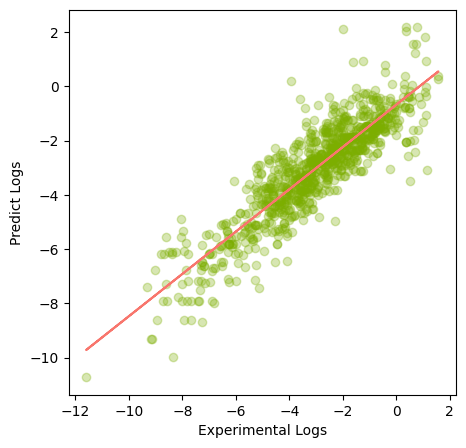

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))
plt.scatter(x=y_train, y=y_lr_train_pred, c='#7CAE00', alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Logs')
plt.xlabel('Experimental Logs')